<a href="https://colab.research.google.com/github/vjaswanthvarma/numpy/blob/main/USA_real_state_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [389]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor

In [390]:
#Load the Model
data=pd.read_csv("/content/realtor-data.csv")
data.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [391]:
#Remove unimportant fatures
data=data.drop('status',axis=1)
data=data.drop('prev_sold_date',axis=1)
data=data.drop('zip_code',axis=1)

In [392]:
data.head()

,bed,bath,acre_lot,city,state,house_size,price
0,3.0,2.0,0.12,Adjuntas,Puerto Rico,920.0,105000.0
1,4.0,2.0,0.08,Adjuntas,Puerto Rico,1527.0,80000.0
2,2.0,1.0,0.15,Juana Diaz,Puerto Rico,748.0,67000.0
3,4.0,2.0,0.10,Ponce,Puerto Rico,1800.0,145000.0
4,6.0,2.0,0.05,Mayaguez,Puerto Rico,NaN,65000.0


In [393]:
data.describe()

,bed,bath,acre_lot,house_size,price
count,75050.000000,75112.000000,85987.000000,7.508200e+04,1.000000e+05
mean,3.701013,2.494595,13.613473,2.180082e+03,4.383656e+05
std,2.091372,1.573324,840.143878,5.625349e+03,1.015773e+06
min,1.000000,1.000000,0.000000,1.000000e+02,4.450000e+02
25%,3.000000,2.000000,0.190000,1.200000e+03,1.250000e+05
50%,3.000000,2.000000,0.510000,1.728000e+03,2.650000e+05
75%,4.000000,3.000000,2.000000,2.582000e+03,4.749000e+05
max,86.000000,56.000000,100000.000000,1.450112e+06,6.000000e+07


In [394]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   bed         75050 non-null   float64
 1   bath        75112 non-null   float64
 2   acre_lot    85987 non-null   float64
 3   city        99948 non-null   object 
 4   state       100000 non-null  object 
 5   house_size  75082 non-null   float64
 6   price       100000 non-null  float64
dtypes: float64(5), object(2)
memory usage: 5.3+ MB


In [395]:
data.isnull().sum()

bed           24950
bath          24888
acre_lot      14013
city             52
state             0
house_size    24918
price             0
dtype: int64

In [396]:
#Handling the null values
data['bed'].fillna(data['bed'].mean(),inplace=True)
data['bath'].fillna(data['bath'].mean(),inplace=True)
data['acre_lot'].fillna(data['acre_lot'].mean(),inplace=True)
data['city'].fillna("Not available",inplace=True)
data['house_size'].fillna(data['house_size'].mean(),inplace=True)

In [397]:
data.isnull().sum()

bed           0
bath          0
acre_lot      0
city          0
state         0
house_size    0
price         0
dtype: int64

In [398]:
data.tail()

,bed,bath,acre_lot,city,state,house_size,price
99995,3.0,3.0,13.613473,Hudson,Massachusetts,2864.0,749900.0
99996,2.0,1.0,0.340000,Auburn,Massachusetts,1075.0,349900.0
99997,3.0,2.0,1.010000,Shrewsbury,Massachusetts,1632.0,549000.0
99998,3.0,2.0,0.120000,Worcester,Massachusetts,1332.0,299000.0
99999,3.0,3.0,21.670000,Grafton,Massachusetts,1846.0,535000.0


In [399]:
data.isnull().sum()

bed           0
bath          0
acre_lot      0
city          0
state         0
house_size    0
price         0
dtype: int64

<ipython-input-400-715c530d649f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a=data.corr()


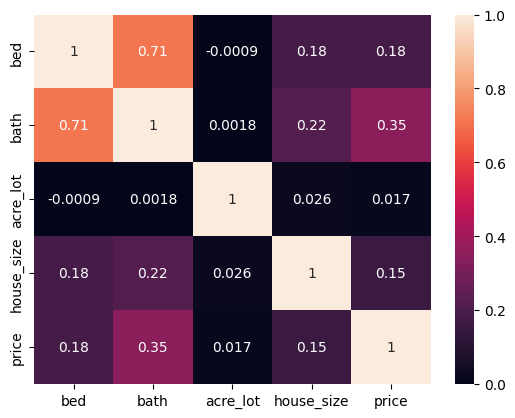

In [400]:
a=data.corr()
sns.heatmap(a,annot=True)
plt.show()

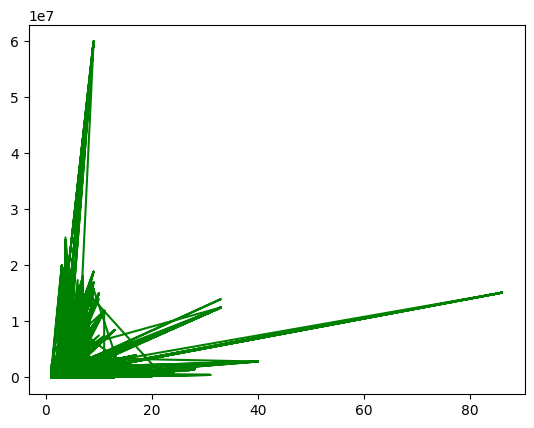

In [401]:
x=data['bed']
y=data['price']
plt.plot(x,y,color='green')
plt.show()

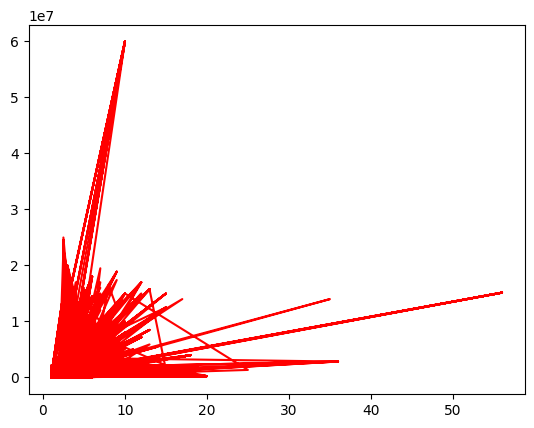

In [402]:
x=data['bath']
y=data['price']
plt.plot(x,y,color='red')
plt.show()

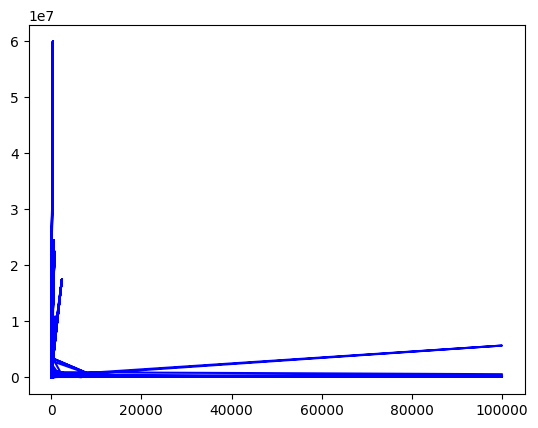

In [403]:
x=data['acre_lot']
y=data['price']
plt.plot(x,y,color='blue')
plt.show()

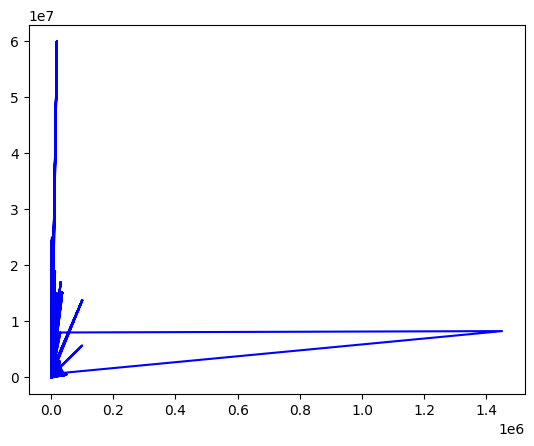

In [404]:
x=data['house_size']
y=data['price']
plt.plot(x,y,color='blue')
plt.show()

In [405]:
data['city'].value_counts()

San Juan       4788
Worcester      3291
Springfield    2888
Pittsfield     2147
Bayamon        1927
               ... 
Scotland          1
Plaistow          1
Niverville        1
Derry             1
Condado           1
Name: city, Length: 526, dtype: int64

In [406]:
data['state'].value_counts()

Massachusetts     52694
Puerto Rico       24679
Connecticut       12178
Virgin Islands     2573
Rhode Island       2401
New Hampshire      2232
New York           1874
Vermont            1324
South Carolina       24
Tennessee            16
Virginia              3
New Jersey            2
Name: state, dtype: int64

In [407]:
a=preprocessing.LabelEncoder()
data['city']=a.fit_transform(data['city'])
data['state']=a.fit_transform(data['state'])

In [408]:
data['city'].value_counts()
data['state'].value_counts()

1     52694
5     24679
0     12178
10     2573
6      2401
2      2232
4      1874
9      1324
7        24
8        16
11        3
3         2
Name: state, dtype: int64

In [409]:
data.head()

,bed,bath,acre_lot,city,state,house_size,price
0,3.0,2.0,0.12,2,5,920.000000,105000.0
1,4.0,2.0,0.08,2,5,1527.000000,80000.0
2,2.0,1.0,0.15,224,5,748.000000,67000.0
3,4.0,2.0,0.10,361,5,1800.000000,145000.0
4,6.0,2.0,0.05,268,5,2180.081737,65000.0


In [410]:
data.isnull().sum()

bed           0
bath          0
acre_lot      0
city          0
state         0
house_size    0
price         0
dtype: int64

In [411]:
x=data.drop('price',axis=1).values
y=data['price'].values

In [412]:
# spilting the entire data set into training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [413]:
x_train.shape,x_test.shape

((70000, 6), (30000, 6))

In [414]:
lreg=LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

In [415]:
y_pred=lreg.predict(x_test)

In [416]:
#Evaluating the model performance
print("mean absolute error: ",mean_absolute_error(y_test,y_pred))
print("mean squared error: ",mean_squared_error(y_test,y_pred))
print("roor mean squared error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_score: ",r2_score(y_test,y_pred))

mean absolute error:  324824.1869200002
mean squared error:  994187931942.7917
roor mean squared error:  997089.7311389742
R2_score:  0.14642711455069735


In [417]:
lreg=RandomForestRegressor()
lreg.fit(x_train,y_train)

RandomForestRegressor()

In [418]:
y_pred=lreg.predict(x_test)

In [419]:
#Evaluating the Model Performance
print("mean absolute error: ",mean_absolute_error(y_test,y_pred))
print("mean squared error: ",mean_squared_error(y_test,y_pred))
print("root mean squared error: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2_score: ",r2_score(y_test,y_pred))

mean absolute error:  28727.510985022036
mean squared error:  60477191860.758415
root mean squared error:  245921.10901823457
R2_score:  0.9480765260753244
